C:\Users\a\AppData\Local\Temp\ipykernel_21520\4281000837.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.1, 0, 1, 0.97])  # 防止标题和图像重叠


Image saved at: D:/PycharmProjects/保存的参数/指纹参数\Fig7.eps


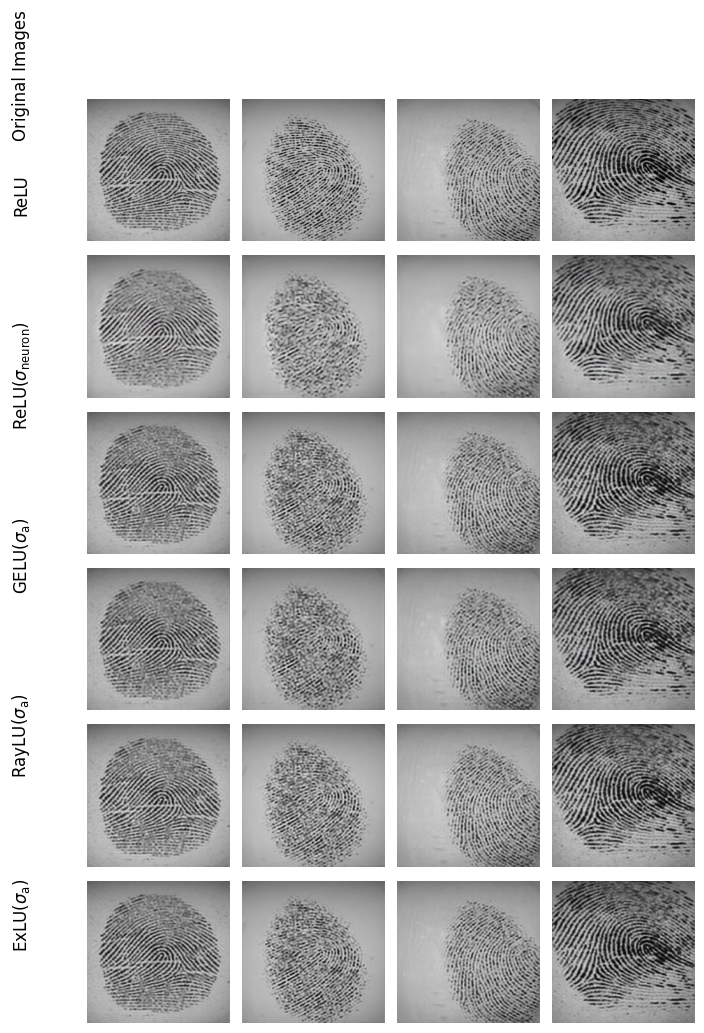

In [4]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import matplotlib.gridspec as gridspec

def show_image_comparisons_tight_v2(folders, indices=[1, 45, 7, 52], save_path=None, filename="comparison.eps"):
    """
    展示原始图像与不同激活函数重建图像的紧凑布局，并保存为 EPS 格式。

    参数：
    - folders: 字典，key 为激活函数名，value 为对应的文件夹路径。
    - indices: 要展示的图像索引，默认为 [45, 7, 52]。
    - save_path: 保存路径（如果为 None 则不保存）。
    - filename: 保存文件名，默认为 "comparison.eps"。
    """
    num_images = len(indices)  # 列数
    total_rows = len(folders) + 1  # 行数（1 行原始图像 + 多行重建图像）

    fig = plt.figure(figsize=(num_images * 2, total_rows * 2))  # 图像大小
    gs = gridspec.GridSpec(total_rows, num_images, wspace=0, hspace=0.1)  # 缩小列间距和行间距

    # 第一行：展示原始图像
    for col, idx in enumerate(indices):
        ax = fig.add_subplot(gs[0, col])
        original_img = Image.open(os.path.join(list(folders.values())[0], f"original_{idx}.png"))
        ax.imshow(original_img)
        ax.axis('off')

    # 设置第一行的标题竖排显示，紧贴第一张照片的左边
    fig.text(0.05, 1 - 0.15 + 0.05, "Original Images", ha='center', va='center', fontsize=12, rotation=90)

    # 后续行：展示不同激活函数的重建图像
    for row, (name, folder) in enumerate(folders.items(), start=1):
        for col, idx in enumerate(indices):
            ax = fig.add_subplot(gs[row, col])
            reconstructed_img = Image.open(os.path.join(folder, f"reconstructed_{idx}.png"))
            ax.imshow(reconstructed_img)
            ax.axis('off')

        # 每一行设置标题，紧贴对应行的第一张图像左边
        fig.text(0.05, 1 - (row + 1) * 0.15 + 0.1, name, ha='center', va='center', fontsize=12, rotation=90)

    plt.tight_layout(rect=[0.1, 0, 1, 0.97])  # 防止标题和图像重叠

    # 保存为 EPS 格式
    if save_path:
        save_file = os.path.join(save_path, filename)
        plt.savefig(save_file, format='eps', bbox_inches='tight')
        print(f"Image saved at: {save_file}")

    plt.show()

# 指定每种激活函数对应的文件夹路径
folders = {
    "ReLU": "D:/PycharmProjects/保存的参数/指纹参数/relu/",
    "ReLU($\sigma_{\mathrm{neuron}}$)": "D:/PycharmProjects/保存的参数/指纹参数/relu(内嵌)/",
    "GELU($\sigma_{\mathrm{a}}$)": "D:/PycharmProjects/保存的参数/指纹参数/gelu/",
    "RayLU($\sigma_{\mathrm{a}}$)": "D:/PycharmProjects/保存的参数/指纹参数/raylu/",
    "ExLU($\sigma_{\mathrm{a}}$)": "D:/PycharmProjects/保存的参数/指纹参数/exlu/"
}

# 自定义保存路径和文件名
save_path = "D:/PycharmProjects/保存的参数/指纹参数"
filename = "Fig7.eps"

# 展示图像对比并保存为 EPS
show_image_comparisons_tight_v2(folders, indices=[1, 45, 7, 52], save_path=save_path, filename=filename)
